# Create media designs for DBTL 1 and DBTL 2

This notebook generates the initial media designs. We use ART's capability to provide initial designs for media components for which to get phenotypic data. These designs and phenotypic data will be used later to predict new designs. 

As this is the initial round of designs, we use Latin Hypercube sampling.


We include a desing that is very close to the standard media (up to 10% variation for each component), as a control for every cycle.

Tested using **ART 3.9.4** kernel on jprime.lbl.gov

## Inputs and output

**Required file to run this notebook:**
- `Putida_media_bounds.csv`
- `standard_recipe_concentrations.csv`

**File generated by running this notebook**
- `recommendations_initial.csv`

The files are stored in the user defined directory. 

## Setup

Clone the git repository with the `ART` library 

`git clone https://github.com/JBEI/AutomatedRecommendationTool.git`  
<!-- <font color='red'> _____ -->
<!-- **WE SHOULD TALK ABOUT LICENSING HERE!!!** </font> -->

or pull the latest version. 

Information about licensing ART is available at https://github.com/JBEI/ART.

Importing needed libraries:

In [1]:
import sys
sys.path.append('../../art')        # Make sure this is the location for the ART library 
sys.path.append('../')
sys.path.append('../../')
    
from art.core import * 
import art.utility as utils
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

/usr/local/art/.venv/lib/python3.11/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## User parameters

### Defining media components and the number of instances (designs) to be created

In [2]:
CYCLE = 1

user_params = {
    'bounds_file': f'../flaviolin yield data/Putida_media_bounds_yield.csv',
    'output_file_path': f'../flaviolin yield data/DBTL{CYCLE}', # Folder for output files,
    'standard_media_file': '../flaviolin yield data/standard_recipe_concentrations.csv',
}

Specify which components to explore:

In [3]:
user_params['components'] = [
    'H3BO3[mM]',
    'Glucose[mM]',
    'K2SO4[mM]',
    'K2HPO4[mM]',
    'FeSO4[mM]',
    'NH4Cl[mM]',
    'MgCl2[mM]',
    'NaCl[mM]',
    '(NH4)6Mo7O24[mM]',
    'CoCl2[mM]',
    'CuSO4[mM]',
    'MnSO4[mM]',
    'ZnSO4[mM]'
]

Here we specify how many instances (designs) we want to create and how many replicates (change as desired). In this case we run two DBTL cycles with initial designs, 12 instances with 4 replicates for each, out of which one design is reserved for the control.

In [4]:
user_params['n_instances'] = 30
user_params['n_replicates'] = 3

In [5]:
df_stand = pd.read_csv(user_params['standard_media_file']).set_index("Component")

In [6]:
df_stand

,Concentration,Solubility
Component,,
MOPS[mM],40.00000,1700.00
Tricine[mM],4.00000,500.08
H3BO3[mM],0.00400,700.00
Glucose[mM],20.00000,5045.63
K2SO4[mM],0.29000,636.98
K2HPO4[mM],1.32000,8564.84
FeSO4[mM],0.01000,1645.73
NH4Cl[mM],9.52000,6543.28
MgCl2[mM],0.52000,569.27


### Generate the control media 

Control media will be uniformly drawn from the interval 90% to 110% around the standard recipe.

In [7]:
ub = 1.1
lb = 0.9
df_control = pd.DataFrame(columns=user_params['components'])

for component in user_params['components']:
    stand_conc = df_stand.loc[component]['Concentration']
    df_control.at[0, component] = stand_conc*np.random.uniform(lb, ub)
    df_control.at[1, component] = stand_conc*np.random.uniform(lb, ub)


In [8]:
df_control

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.004036,19.375409,0.317593,1.247137,0.010136,10.289352,0.529784,54.910593,0.00003,0.000275,0.000092,0.00075,0.000105
1,0.004377,20.425358,0.302532,1.340722,0.009445,10.1547,0.570193,50.810054,0.00003,0.000282,0.000105,0.000779,0.000099


### Random media

Read bounds:

In [9]:
df_bounds = pd.read_csv(user_params['bounds_file'])

In [10]:
df_bounds

,Variable,Min,Max
0,H3BO3[mM],0.000400,0.0400
1,Glucose[mM],2.000000,200.0000
2,K2SO4[mM],0.029000,2.9000
3,K2HPO4[mM],0.264000,6.6000
4,FeSO4[mM],0.001000,0.1000
5,NH4Cl[mM],6.346667,14.2800
6,MgCl2[mM],0.052000,5.2000
7,NaCl[mM],5.000000,500.0000
8,(NH4)6Mo7O24[mM],0.000003,0.0003
9,CoCl2[mM],0.000030,0.0030


In [11]:
df_bounds_factor = pd.DataFrame(columns=['Variable', 'Min', 'Max'])
df_bounds_factor['Variable'] = user_params['components']
df_bounds_factor['Min'] = -1*np.ones(13)
df_bounds_factor['Max'] = np.ones(13)
df_bounds_factor

,Variable,Min,Max
0,H3BO3[mM],-1.0,1.0
1,Glucose[mM],-1.0,1.0
2,K2SO4[mM],-1.0,1.0
3,K2HPO4[mM],-1.0,1.0
4,FeSO4[mM],-1.0,1.0
5,NH4Cl[mM],-1.0,1.0
6,MgCl2[mM],-1.0,1.0
7,NaCl[mM],-1.0,1.0
8,(NH4)6Mo7O24[mM],-1.0,1.0
9,CoCl2[mM],-1.0,1.0


Draw LH samples from [-1, 1]

If [0, 1] map it to [1, 10] or [1, 5] or [1, 1.5].

If [-1, 0] map it to [1/10, 1] or [1/5, 1] or [1/1.5, 1].

In [12]:
mapping = lambda x, factor: 1 + -1*((1/factor) -1)*x if x < 0 else 1 + (factor-1)*x


In [13]:
bounds_factor_file = f'../flaviolin yield data/Putida_media_bounds_factor.csv'

In [14]:
df_bounds_factor.to_csv(bounds_factor_file)

Define a dictionary that contains the settings that ART will use to find the recommended designs:

In [15]:
art_params = {
    'input_vars': user_params['components'],
    'bounds': utils.read_table(bounds_factor_file), # file with bounds# input variables, i.e. features
    'num_recommendations': user_params['n_instances'],    # one of them will be wild type
    'initial_cycle': True,                                    # Set this to True for initial designs recommendations
    'seed': 10,                                               # seed for number random generator
    'output_dir': user_params['output_file_path']  # directory to store this output
}


With the configuration stored in `art_params`, we now run ART:

In [16]:
art = RecommendationEngine(**art_params)
df = art.recommendations.copy()
df.tail()

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
25,-0.356885,0.908408,0.201431,0.090893,0.607466,0.476016,-0.732088,-0.738780,-0.999308,0.845997,-0.495898,0.925429,-0.289531
26,-0.204463,0.312133,0.756266,-0.104290,0.292126,-0.133424,0.412106,0.883062,0.790349,-0.731620,-0.430020,0.698749,-0.137154
27,0.982016,0.544090,0.976667,-0.755148,-0.147123,-0.579148,-0.153047,0.814010,-0.146969,0.247542,0.947598,-0.753328,0.111193
28,-0.673257,-0.551268,-0.969606,0.988355,-0.111269,-0.784184,-0.575578,-0.908870,-0.910047,-0.859238,0.798005,-0.992493,0.009069
29,-0.485744,-0.952197,0.568599,0.278374,0.494761,-0.845904,0.019488,-0.560673,0.932831,0.315865,-0.566532,0.823222,0.461137


Transform these bounds into our factors:

In [17]:
df_ranges_factors = df.copy()

factor = {}
for comp in (user_params['components']):
    factor[comp] = np.sqrt(
        df_bounds[df_bounds['Variable']==comp]['Max'] / df_bounds[df_bounds['Variable']==comp]['Min']
    )

for ind in df.index:
    for comp in df.columns:
        df_ranges_factors.at[ind, comp] = mapping(df.at[ind, comp], factor[comp])


/tmp/ipykernel_31635/2468791813.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df_ranges_factors.at[ind, comp] = mapping(df.at[ind, comp], factor[comp])


In [18]:
df_ranges_factors.head()

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.915356,1.649462,0.499840,0.465371,1.745048,0.838173,0.520742,0.524818,0.694507,2.354453,1.881329,0.682443,0.923094
1,8.296220,0.547436,8.303706,1.804027,8.337455,0.667316,0.759318,0.848490,0.339077,5.923166,2.767865,0.495030,0.533235
2,0.274018,6.484758,0.744781,4.113865,7.054268,1.011435,0.761695,0.438996,6.173647,0.179982,0.268696,0.963319,0.284594
3,4.470850,7.644177,0.861745,0.646678,0.458138,1.413399,0.679881,7.408306,0.988159,0.682863,0.751186,0.178908,7.679619
4,1.091574,0.409401,0.361544,0.811679,4.794737,0.885179,0.145211,2.273934,0.780399,0.759410,7.094781,8.015158,0.101482


Transform these factors into our ranges:

In [19]:
df_ranges = df.copy()

for comp in df.columns:
    stand_conc = df_stand.loc[comp, 'Concentration']
    df_ranges.loc[:, comp] = stand_conc * df_ranges_factors.loc[:, comp]

In [20]:
df_control.loc[0].to_frame().T

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.004036,19.375409,0.317593,1.247137,0.010136,10.289352,0.529784,54.910593,0.00003,0.000275,0.000092,0.00075,0.000105


## Cycle 1

In [21]:
df_target_1 = df_ranges.iloc[:15]
df_target_1 = pd.concat([df_target_1,df_control.loc[0].to_frame().T], axis=0).reset_index(drop=True)
df_target_1


,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.003661,32.989243,0.144954,0.61429,0.01745,7.979403,0.270786,26.240883,0.000021,0.000706,0.000188,0.000546,0.000092
1,0.033185,10.948725,2.408075,2.381316,0.083375,6.352852,0.394845,42.424487,0.00001,0.001777,0.000277,0.000396,0.000053
2,0.001096,129.69516,0.215986,5.430301,0.070543,9.628863,0.396082,21.94981,0.000185,0.000054,0.000027,0.000771,0.000028
3,0.017883,152.883536,0.249906,0.853615,0.004581,13.455555,0.353538,370.415298,0.00003,0.000205,0.000075,0.000143,0.000768
4,0.004366,8.18801,0.104848,1.071417,0.047947,8.426907,0.07551,113.696695,0.000023,0.000228,0.000709,0.006412,0.00001
5,0.025473,85.752038,2.587435,0.34554,0.005927,9.224616,1.191067,18.632419,0.000015,0.000191,0.000338,0.001205,0.000068
6,0.026303,17.87547,0.287261,4.410328,0.03083,10.915878,3.457469,58.112395,0.000017,0.000171,0.000042,0.007752,0.000391
7,0.036303,104.156823,1.109682,3.923182,0.027746,14.012436,0.170738,255.579382,0.000097,0.000286,0.000414,0.004878,0.000684
8,0.001897,3.498686,0.123603,4.924548,0.093853,10.07807,0.305175,348.362796,0.000039,0.001425,0.000911,0.000577,0.000619
9,0.000416,13.195077,1.211772,5.553505,0.003632,13.109188,3.968992,280.773749,0.000249,0.001727,0.000563,0.003535,0.000263


In [22]:
df_target_2 = df_ranges.iloc[15:]
df_target_2 = pd.concat([df_target_2,df_control.iloc[1].to_frame().T]).reset_index(drop=True)
df_target_2

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
0,0.003982,147.780153,0.263819,1.292187,0.001388,10.224859,1.888788,146.589727,0.000013,0.001232,0.00009,0.000292,0.000044
1,0.000835,168.691467,1.582973,5.928974,0.008197,12.175665,2.941506,93.463208,0.000219,0.000281,0.000015,0.000702,0.000869
2,0.02807,48.290701,0.050736,3.717661,0.003228,12.521628,2.167364,48.287588,0.000199,0.000102,0.000067,0.000751,0.000048
3,0.00184,17.503938,0.180177,0.907252,0.007352,8.871259,0.229971,389.077478,0.000155,0.002382,0.000094,0.000213,0.000453
4,0.030823,28.999934,2.041315,0.792188,0.077666,9.327027,1.488931,39.345179,0.000286,0.000144,0.000018,0.004315,0.000079
5,0.001197,61.224053,0.162114,0.431079,0.096605,7.196318,4.424864,31.319152,0.000075,0.000231,0.0001,0.002591,0.000027
6,0.013591,7.776299,0.185782,0.635024,0.060147,8.512225,0.091263,306.592593,0.000011,0.000136,0.000659,0.00524,0.000881
7,0.022824,19.198165,0.231138,0.703245,0.002589,13.761903,0.139671,33.726669,0.000129,0.000643,0.000464,0.000445,0.00033
8,0.002541,14.963689,0.596894,3.250119,0.005459,6.648918,4.755801,7.669199,0.000064,0.002742,0.000619,0.000489,0.000569
9,0.015026,11.846601,2.001594,1.408274,0.010945,12.934813,0.499735,36.766347,0.000028,0.001979,0.000399,0.002753,0.000018


### Checking the distribution of initial designs

In [23]:
def designs_pairwise(art, df):

    dim = art.num_input_var

    plt.style.use(["seaborn-v0_8-talk"])

    fig = plt.figure(figsize=(35, 35))
    fig.patch.set_facecolor("white")

    X = df.values

    for var1 in range(dim):
        for var2 in range(var1 + 1, dim):

            ax = fig.add_subplot(dim, dim, (var2 * dim + var1 + 1))
            ax.scatter(
                X[:, var1],
                X[:, var2],
                c="r",
                edgecolor="r",
                marker="+",
                lw=1,
                label="Train data",
            )
            
            if var2 == (dim - 1):
                ax.set_xlabel(art.input_vars[var1])
            if var1 == 0:
                ax.set_ylabel(art.input_vars[var2])
                if var2 == 0:
                    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), shadow=True)

    fig.savefig(user_params['output_file_path']+'/designs_pairwise.png', transparent=False, dpi=300
    )

/code/flaviolin_yield_notebooks_final/../art/core/recommendation_engine.py:385: UserWarning: num_input_var is deprecated. Update your code to use len(input_vars) instead.  The num_input_var alias will be removed in a future ART version.
  warnings.warn(
/tmp/ipykernel_31635/597982494.py:16: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


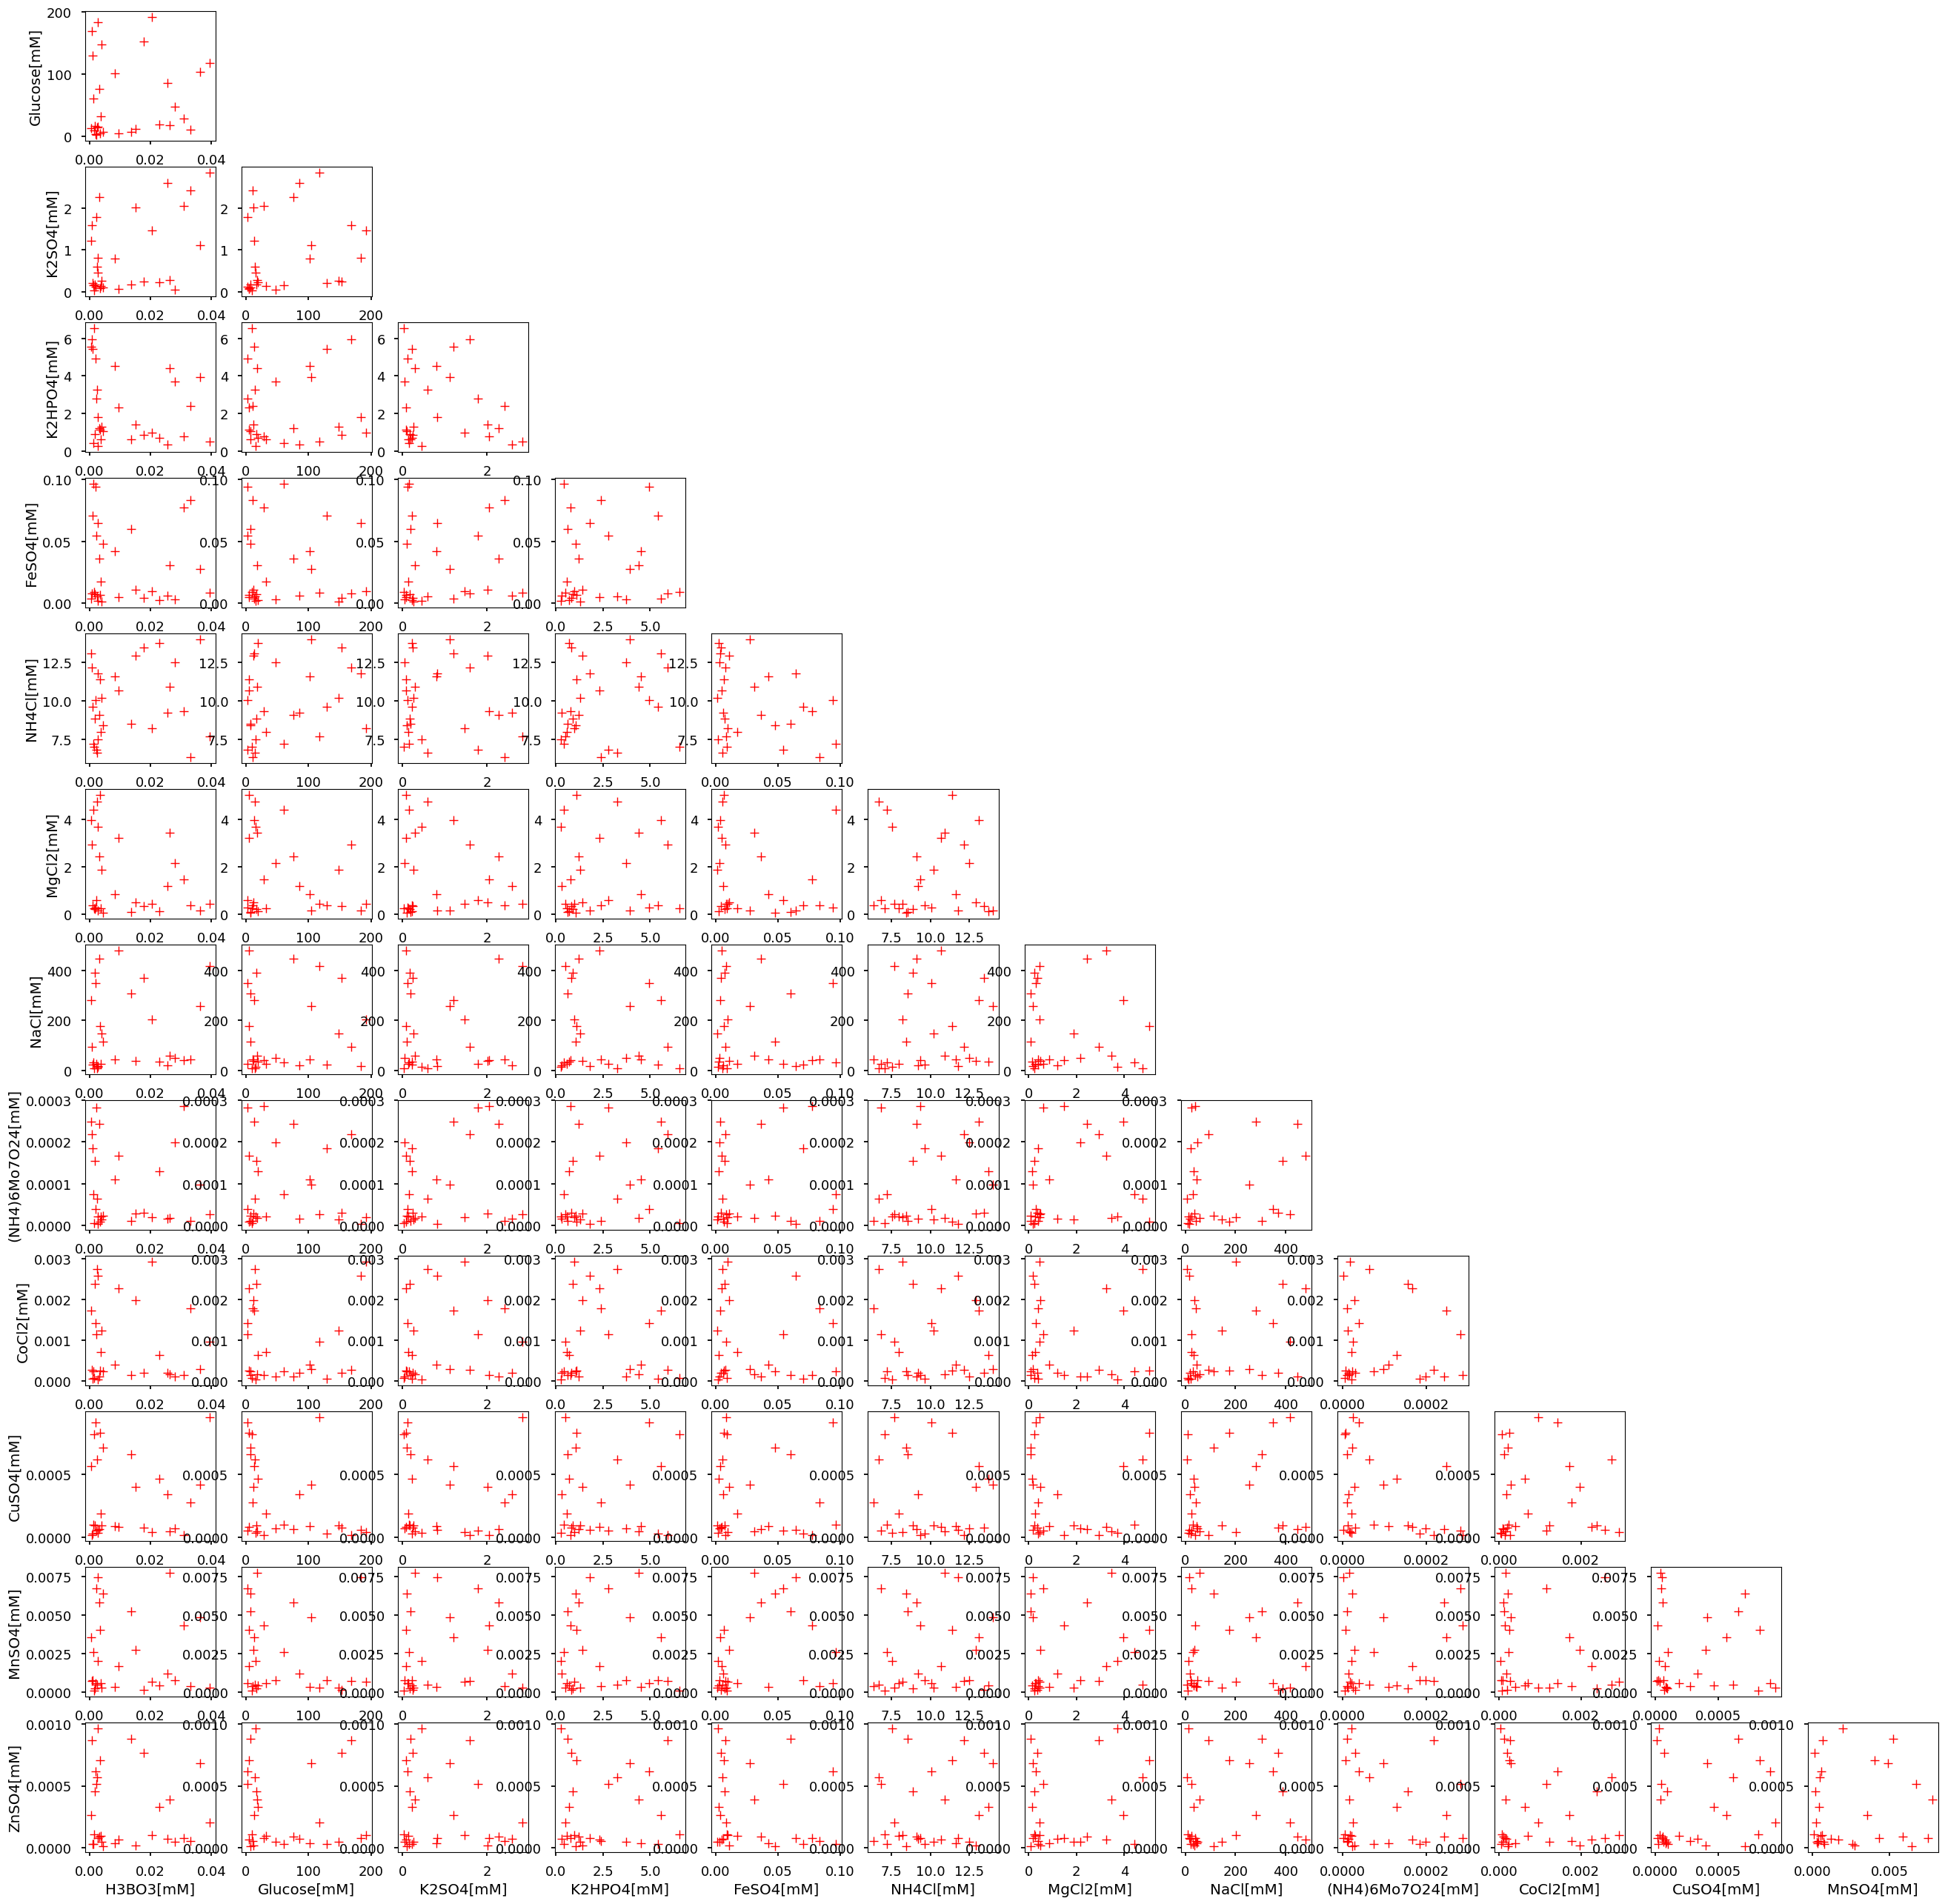

In [24]:
designs_pairwise(art, df_ranges)

## Saving the generated designs

Include all replicates: 

In [25]:
df_target_1 = df_target_1.loc[df_target_1.index.repeat(user_params['n_replicates'])]
df_target_2 = df_target_2.loc[df_target_2.index.repeat(user_params['n_replicates'])]


Rename index to well names:

In [26]:
well_rows = 'ABCDEF'
well_columns = '12345678'

In [27]:
well_names = [f'{row}{column}'  for column in well_columns for row in well_rows]

df_target_1['Well'] = well_names
df_target_1 = df_target_1.set_index(['Well'])
df_target_1

,H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM]
Well,,,,,,,,,,,,,
A1,0.003661,32.989243,0.144954,0.61429,0.01745,7.979403,0.270786,26.240883,0.000021,0.000706,0.000188,0.000546,0.000092
B1,0.003661,32.989243,0.144954,0.61429,0.01745,7.979403,0.270786,26.240883,0.000021,0.000706,0.000188,0.000546,0.000092
C1,0.003661,32.989243,0.144954,0.61429,0.01745,7.979403,0.270786,26.240883,0.000021,0.000706,0.000188,0.000546,0.000092
D1,0.033185,10.948725,2.408075,2.381316,0.083375,6.352852,0.394845,42.424487,0.00001,0.001777,0.000277,0.000396,0.000053
E1,0.033185,10.948725,2.408075,2.381316,0.083375,6.352852,0.394845,42.424487,0.00001,0.001777,0.000277,0.000396,0.000053
F1,0.033185,10.948725,2.408075,2.381316,0.083375,6.352852,0.394845,42.424487,0.00001,0.001777,0.000277,0.000396,0.000053
A2,0.001096,129.69516,0.215986,5.430301,0.070543,9.628863,0.396082,21.94981,0.000185,0.000054,0.000027,0.000771,0.000028
B2,0.001096,129.69516,0.215986,5.430301,0.070543,9.628863,0.396082,21.94981,0.000185,0.000054,0.000027,0.000771,0.000028
C2,0.001096,129.69516,0.215986,5.430301,0.070543,9.628863,0.396082,21.94981,0.000185,0.000054,0.000027,0.000771,0.000028


In [ ]:
file = f'../flaviolin yield data/DBTL1/target_concentrations.csv'
df_target_1.to_csv(file)

In [ ]:
df_target_2['Well'] = well_names
df_target_2 = df_target_2.set_index(['Well'])

In [ ]:
file = f'../flaviolin yield data/DBTL2/target_concentrations.csv'
df_target_2.to_csv(file)

In [ ]:
df_target_2.head()